# Machine Learning
---
### Lecture 5: Linear Classification: SVM

In [60]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt

import matplotlib
nice_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif" : "Times New Roman",
#     "font.size": 30,
    "lines.linewidth":3,
    "axes.titlesize":30,
    "axes.labelsize":24,
    "xtick.labelsize":14,
    "ytick.labelsize":14,
}
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update(nice_fonts)
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

## Learning Outcomes

* Recall Linear Regression
* Derive optimization problem for SVM
* Understand what is a support vector
* Understand what is a kernel and a kernel trick

# Binary Linear Classification
--- 


<table><tr>
<td> <img src="img/3_1.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

#### Training Dataset:

$$
\mathcal{D} = \{x_n, y_n\}_{n=1}^N, y_n \in \{-1, 1\}
$$
#### Model:

$$
a(x_n) = sign(\langle w, x_n\rangle)
$$
#### Cost function:

$$
\mathcal{L}(a, X) = \frac{1}{N}\sum_{n=1}^N \left[a(x_n) \neq y_n \right] = \frac{1}{N}\sum_{n=1}^N \left[M_n < 0 \right] ,\\
M_n = y_n \langle w, x_n\rangle
$$




M - Margin shows for each object how far it is from a separating hyperplane. If it is positive - correct class. If it is negative - wrong class. 

In [30]:
x_grid = np.linspace(-2, 2, 100)
def step(M):
    res = np.ones_like(M)
    res[M > 0] = 0
    return res

def hinge(M):
    return np.maximum(np.zeros_like(M), 1 - M)
    
def logistic(M):
    return np.log(1 + np.exp(-M))/np.log(2)

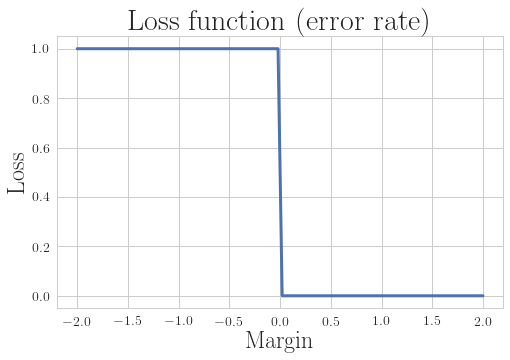

In [61]:
plt.title('Loss function (error rate)')
plt.xlabel('Margin')
plt.ylabel('Loss')

plt.plot(x_grid, step(x_grid));

How to optimize such loss?

Gradeint is 0 almost everywhere. 

$$
0 \leq  \frac{1}{N}\sum_{n=1}^N \left[M_n < 0 \right] \leq \frac{1}{N}\sum_{n=1}^N \widetilde{L}(a, x_n) \rightarrow \min
$$

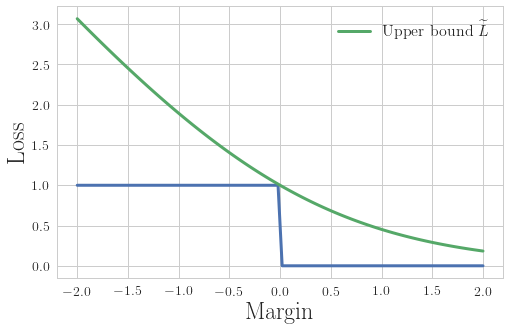

In [64]:
plt.xlabel('Margin')
plt.ylabel('Loss')

plt.plot(x_grid, step(x_grid));
plt.plot(x_grid, logistic(x_grid), label=r'Upper bound $\widetilde{L}$');

plt.legend(fontsize=16);

Sometimes we can replace the loss function we care about with one
which is easier to optimize. This is known as a surrogate loss function.

Different upper bounds lead to models with different properties
* Logistic loss   $\quad \Rightarrow \quad$ Logistic Regression
* Hinge Loss + $L_2$ regularization $\quad \Rightarrow\quad$ Linear SVM

Can we go other way around? From properties to upper bound.

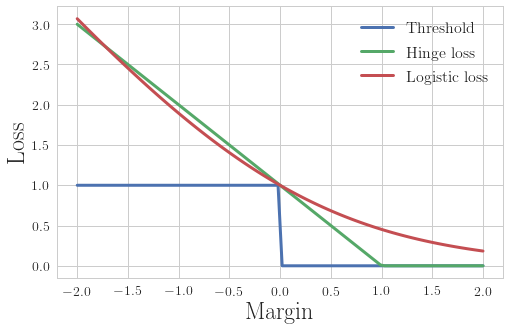

In [66]:
plt.xlabel('Margin')
plt.ylabel('Loss')
plt.plot(x_grid, step(x_grid), label='Threshold');
plt.plot(x_grid, hinge(x_grid), label='Hinge loss');
plt.plot(x_grid, logistic(x_grid), label='Logistic loss');
plt.legend(fontsize=16);

## Logistic Regression
#### Training Dataset:  $\quad \mathbb{Y} = \{-1, 1\}$

#### Model: $\quad \quad  \quad \quad  a(X) = \text{sign}(\langle w, x \rangle)$

How to change the model, so that we have **probabilities** as an output?

In [86]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x_1 = 4 + np.random.random(20)*5
x_0 = np.random.random(20)*5
x = np.concatenate([x_0, x_1])
x_grid = np.linspace(0, 10, 20)
y = np.concatenate([np.zeros_like(x_0), np.ones_like(x_0)])

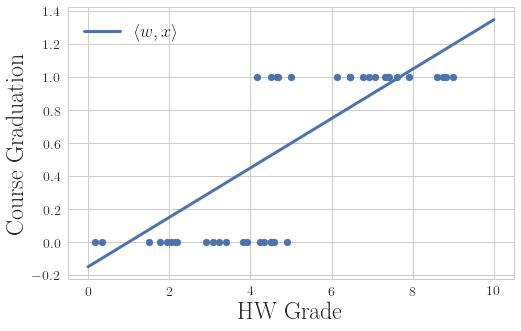

In [100]:
plt.xlabel('HW Grade')
plt.ylabel('Course Graduation')
plt.scatter(x, y);
plt.plot(x_grid, -.15 + 0.15*x_grid, label=r'$\langle w, x \rangle$');
plt.legend(fontsize=18);

Let's convert outputs $\langle w, x \rangle$ to [0, 1] with sigmoid:

$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$

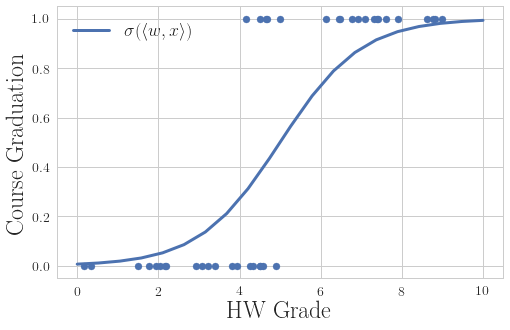

In [104]:
plt.xlabel('HW Grade')
plt.ylabel('Course Graduation')
plt.scatter(x, y);
plt.plot(x_grid, sigmoid(-5 + 1*x_grid), label=r'$\sigma(\langle w, x \rangle)$');
plt.legend(fontsize=18);

## Traning Logisitc Regression

* We define probability of a positive class as

$$
\mathbb{P}(y_n = 1) = \sigma(\langle w, x_n\rangle )
$$

* Maximum likelihood

$$
 \log \prod_n p(y_n) \rightarrow \max_{w}
$$

* Final objective

$$
\mathcal{L} = \sum_{n} \log (1 + \exp( - y_n \langle w, x_n \rangle )) \rightarrow \min_w
$$

# Supprot Vector Machine
--- 


### Upper bound approach

* Hinge loss 

$$
 \left[M_n(w) < 0 \right] \leq \max \left(0,  1 - M_n(w)\right)
$$

* and  $L_2$ regularization

$$
\mathcal{L} =  \max \left(0,  1 - M_n(w)\right) + \frac{1}{2C}\|w\|^2 \rightarrow \min_w
$$

### How to choose the best classifier

<table><tr>
<td> <img src="https://quantdare.com/wp-content/uploads/2016/09/SVM1.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>



### Definitions

* Linear Classifier defines a hyperplane: 

$$\langle w, x \rangle = 0$$

* Distance from $x^*$ to this hyperplane:

$$\frac{|\langle w, x^* \rangle|}{\|w\|} $$


### Step 1. Linearly Separable Case (Hard Margin)

We can perfectly classify all the points:
$$
M_n(w) > 0 \, \forall n
$$



We say that the best classifier would have the largest margin.

How many points will be on the border? (minimum)

#### Margin of a classifier - the wider the better

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>



## Goal

* Maximal Margin

* No erros

## Goal

* Maximal Margin

$$
\max_w \left( 2 \min_n \frac{|\langle x_n, w \rangle|}{\|w\|} \right)
$$

* No erros

$$
M_n(w) > 0\, \forall n
$$

Let's normalize the weights by $\min_n |\langle x_n, w \rangle|$. 

Namely, $w^{new} = \frac{w}{\min_n |\langle x_n, w \rangle|}\,\, \Rightarrow \,\,  \min_n |\langle w^{new}, x_n \rangle| = 1$

Why can we do that?

## Goal

* Maximal Margin

$$
\frac{2}{\|w\|} \rightarrow \max_w
$$

* No erros

$$
M_n(w) > 0\, \forall n
$$

* Normalization

$$
\min_n |\langle w, x_n \rangle| = 1
$$

## Goal

* Maximal Margin

$$
\max_w \frac{2}{\|w\|}
$$

* No erros + Normalization

$$
y_n \langle w, x_n \rangle \geq 1 \, \forall n
$$

## Hard Margin SVM

\begin{equation}
\begin{cases}
\min_w \frac{1}{2}\|w\| \\
M_n(w) \geq 1
\end{cases}
\end{equation}

###  Step 2. Soft Margin
<table><tr>
<td> <img src="https://miro.medium.com/max/1104/1*CD08yESKvYgyM7pJhCnQeQ.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>



If sample is not linearly separable, the system of inequalities will have emlty solution.

Let's soften the restrictions. We introduce auxilary **slack** variables $\xi_n$:

\begin{equation}
\begin{cases}
\min_{x, \xi_n} \frac{1}{2}\|w\| + C \sum_n \color{red}{\xi_n}\\
M_n(w) \geq 1 - \color{red}{\xi_n}\\
\color{red}{\xi_n} \geq 0
\end{cases}
\end{equation}

* $\xi$ controls how "hard" we violate the constraint
* We need to penalize for these violations

<table><tr>
<td> <img src="https://www.researchgate.net/profile/Lang-Tran/publication/327015448/figure/fig2/AS:659696117633025@1534295219130/SVM-with-soft-margin-kernel-with-different-cases-of-slack-variables.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>


C is a hyperparameter. On practicals you will see, how that influences the solution

We have a quadratic optimization with linear constraints

--
Write a single restriction here

\begin{cases}
\min_{x, \xi_n} \frac{1}{2}\|w\| + C \sum_n \xi_n\\
\xi_n \geq \max(0, 1 - M_n(w)) \\
\end{cases}



Equivalent unconditional optimization task

$$
\min_w  \left( \frac{1}{2}\|w\| + C \sum_n \max(0, 1 - M_n(w))\right)
$$

When we substitute inequlity by equality, we are minimizing w.r.t. $\xi$. So we can substitute it

We see exactly L2 reg (first term) and hinge loss (second term). Recall that we had this obj. in the very begining when we were using hinge loss as an upper bound on the error rate. 

Here we obtain the same results from geometrical point view

It is still not clear, what is the support vector.

\begin{equation}
\begin{cases}
\min_{x, \xi_n} \frac{1}{2}\|w\| + C \sum_n \xi_n\\
M_n(w) \geq 1 - \xi_n\\
\xi_n \geq 0
\end{cases}
\end{equation}

### Karush-Kunh-Tucker condition

\begin{equation}
\begin{cases}
\min f(x) \\
g_i (x) \leq 0
\end{cases}
\end{equation}

If $x$ is a local minimum, $\exists \, \mu_i$:

\begin{equation}
\begin{cases}
 \frac{\partial \mathcal{L}}{\partial x} = 0\\
g_i (x) \leq 0 \\
\mu_i \geq 0 \\
\mu_i g_i(x) = 0
\end{cases} , \,\text{where} \quad  
\mathcal{L} = f(x) + \sum_i \mu_i g_i(x)
\end{equation}

### KKT for SVM


\begin{equation}
\begin{cases}
w = \sum_n \lambda_n y_n x_n, \quad \nu_n + \lambda_n = C \\ 
M_n(w)  \geq 1 - \xi_n \\
\lambda_n \geq 0, \nu_n \geq 0, \xi_n \geq 0 \\
\lambda_n (1 - \xi_n - M_n(w)) = 0 \\
\nu_n \xi_n  = 0  \\
\end{cases} 
\end{equation}

* $w$ is a weighted sum of features. 

Types of objects depending on $\lambda_n$
* If $\lambda_n = 0$. This object does not "participate" in the solution:
    - $\nu_n = C$
    - $\xi = 0$
    - $M_n(w) \geq 1$

### KKT for SVM
\begin{equation}
\begin{cases}
w = \sum_n \lambda_n y_n x_n, \quad \nu_n + \lambda_n = C \\ 
M_n(w)  \geq 1 - \xi_n \\
\lambda_n \geq 0, \nu_n \geq 0, \xi_n \geq 0 \\
\lambda_n (1 - \xi_n - M_n(w)) = 0 \\
\nu_n \xi_n  = 0  \\
\end{cases} 
\end{equation}

Types of objects depending on $\lambda_n$
* If $\lambda_n = 0$. This object does not "participate" in the solution:
    
* If $\lambda_n \in (0, C)$. This is a **support vector**, which lies on the border:
    - $\nu_n \in (0, C)$ and $1 - \xi_n - M_n(w) = 0$
    - $\xi_n = 0$
    - $M_n(w) = 1$

### KKT for SVM
\begin{equation}
\begin{cases}
w = \sum_n \lambda_n y_n x_n, \quad \nu_n + \lambda_n = C \\ 
M_n(w)  \geq 1 - \xi_n \\
\lambda_n \geq 0, \nu_n \geq 0, \xi_n \geq 0 \\
\lambda_n (1 - \xi_n - M_n(w)) = 0 \\
\nu_n \xi_n  = 0  \\
\end{cases} 
\end{equation}

Types of objects depending on $\lambda_n$
* If $\lambda_n = 0$. This object does not "participate" in the solution
* If $\lambda_n \in (0, C)$. This is a **support vector**, which lies on the border
* If $\lambda_n = C$. This is a **support vetor**, which lies inside the border (or on the wrong side):
    - $\nu_n  = 0$  and $1 - \xi_n - M_n(w) = 0$
    - $\xi_n > 0$
    - $M_n(w) < 1$


<table><tr>
<td> <img src="https://i.stack.imgur.com/npEOk.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>


### Dual Problem

$$
\begin{cases}
- \mathcal{L} = - \sum_n \lambda_n  + \frac12 \sum_n \sum_m \lambda_n \lambda_m y_m y_n\langle x_n, x_m \rangle \rightarrow \min_{\lambda}\\
0 \leq \lambda_n \leq C
\end{cases} 
$$

where
$$
w = \sum_n \lambda_n y_n x_n
$$

Therefore, the resulting classifier is:

$$
a(x)  = \text{sign} \left(\sum_n \lambda_n y_n \langle x, x_n\rangle \right)
$$

This is called the dual problem. 

the dual maximization problem is a quadratic function with linear constrains. 

What is important?

Note that now we have **everywhere** only scalar products of different objects. (not of the features itself)

### Dual Problem

$$
\begin{cases}
- \mathcal{L} = - \sum_n \lambda_n  + \frac12 \sum_n \sum_m \lambda_n \lambda_m y_m y_n \color{red}{\langle x_n, x_m \rangle} \rightarrow \min_{\lambda}\\
0 \leq \lambda_n \leq C
\end{cases} 
$$

where
$$
w = \sum_n \lambda_n y_n x_n
$$

Therefore, the resulting classifier is:

$$
a(x)  = \text{sign} \left(\sum_n \lambda_n y_n \color{red}{\langle x, x_n\rangle} \right)
$$

What is we subsitute the scala product by an arbitrary function, which takes as input 2 objects and return a number

This is cool, cause we may get a super non-linear function

### Kernel Trick 

* Can we take an arbitrary function $K(x, x^{'})$ and use it instead of $\langle x, x^{'}\rangle$ in SVM formulation?

* Yes! But...

* But $K(x, x^{'})$ should be a kernel

aka there should be some space, in which $K(x, x^{'})$ is a scalar product. Namely,

$$\exists \psi, s.t. K(x, x^{'}) = \langle \psi(x), \psi(x^{'})\rangle$$

* Good news: we do not have to know much about this space
* Bad news: we need to ensure that $K$ is indeed a kernel

### Constructing a kernel

What **is** a kernel:
* $K(x, x^{'}) = \langle x, x^{'}\rangle$

* Constant: $K(x, x^{'}) = 1$

* Product of 2 kernels: $K(x, x^{'}) = K_1(x, x^{'})K_2(x, x^{'})$

* Weighted sum: $K(x, x^{'}) = \alpha_1 K_1(x, x^{'}) + \alpha_2 K_2(x, x^{'}), \alpha_1, \alpha_2 > 0$

Definition of a kernel is a pretty comlicated thing, which is hard to validate on practice. Instead, we can use these properties

### Kernel example

Consider the following kernel:

$$
K(a, b) = \langle a, b\rangle ^2, a, b \in \mathbb{R}^2
$$

Let's open the brackes
$$
K(a, b) = \langle (a_1^2, a_2^2, \sqrt{2} a_1 a_2), (b_1^2, b_2^2, \sqrt{2} b_1 b_2)\rangle ^2
$$

That is 

$$\psi(a) = (a_1^2, a_2^2, \sqrt{2} a_1 a_2)$$

That is, we have constructed a kernel, which map 2d space into 3d space. 

**important** we do not have to perform this mappint explicitly. we only need to evaluate the value of $K$

### Examples of kernels

* Polynomial kernel

$$K(x, x^{'}) = \langle x, x^{'}\rangle^d $$

or

$$K(x, x^{'}) = \langle x, x^{'} + 1\rangle^d $$

* Radial basis functions

$$K(x, x^{'}) = \exp(-\gamma \|x - x^{'}\|) $$

What's the difference betwenn 1 and second?

First contains only monomials of order d, whle second - of order <= d

RBF has an extra parameter - $\gamma$. You will play with it during tutorial

### Kernel SVM

* Objective
$$
\begin{cases}
- \mathcal{L} = - \sum_n \lambda_n  + \frac12 \sum_n \sum_m \lambda_n \lambda_m y_m y_n \color{red}{K(x_n, x_m)} \rightarrow \min_{\lambda}\\
0 \leq \lambda_n \leq C
\end{cases} 
$$


* Resulting classifier is:

$$
a(x)  = \text{sign} \left(\sum_n \lambda_n y_n \color{red}{K(x, x_n)} \right)
$$

What happens under the hood

* We map intial features to a new space
* This new space is defined by a jernel that we choose
* Them we do linear classification in that space


<table><tr>
<td> <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_exercise_001.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_exercise_003.png" alt="Drawing" style="width: 500px;"/> </td>
    <td> <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_exercise_002.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>


## Learning Outcomes

* Recall Linear Regression
* Derive optimization problem for SVM
* Understand what is a support vector
* Understand what is a kernel and a kernel trick